Simulação de Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Nesse exercíco, iremos prever o lucro bruto futuro da empresa. 

In [2]:
rev_m = 170      #Receita esperada  'em milhões '
rev_stdev = 20    #Desvio padrão 'Em milhões'
iterations = 1000  # Efetuar 1.000 simulações de um distribuição normal.

In [3]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([148.5059777 , 161.62552035, 188.10883701, 181.39938747,
       193.94744713, 145.64581215, 167.40473317, 187.73505861,
       207.97155106, 172.41464062, 171.13135692, 184.11577536,
       195.56810122, 151.10012101, 164.32602289, 176.42462389,
       168.69604879, 130.38590113, 157.22845426, 163.4630156 ,
       210.94993765, 149.94566611, 158.80489735, 176.85947602,
       142.48484838, 168.76867896, 169.12653242, 175.9864198 ,
       169.43878199, 161.10620396, 182.41919943, 168.50565186,
       182.32678257, 177.57722346, 159.89926914, 124.22258976,
       157.81594089, 142.56278777, 126.07875287, 154.97454376,
       200.86004742, 177.73724154, 142.1725907 , 183.86871271,
       193.85966859, 186.4014701 , 168.72634931, 178.03972418,
       152.26073049, 147.99581168, 182.07412236, 165.28464166,
       151.13612446, 164.06819005, 191.92782824, 141.12172409,
       201.22047431, 191.89310204, 146.35456066, 139.05525897,
       157.58991375, 150.13796135, 184.20841111, 172.27

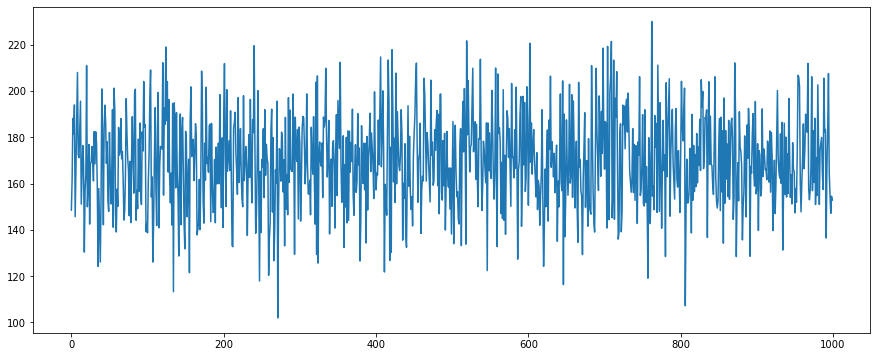

In [4]:
plt.figure(figsize = (15, 6))    # Distribuição de receitas esperadas
plt.plot(rev)
plt.show()

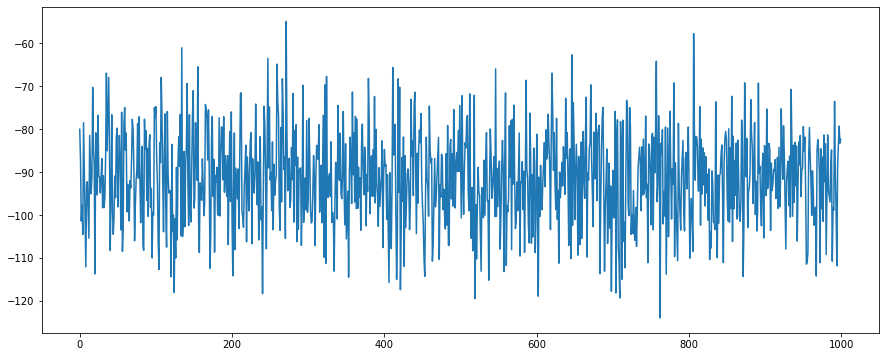

In [5]:
COGS = - (rev * np.random.normal(0.6, 0.1))   #0.6 = 60% . Corresponde ao custo das mercadoria vendidas e 0.1 corresponde ao desvio padrão.

plt.figure(figsize = (15, 6))
plt.plot(COGS)
plt.show()

In [6]:
COGS.mean()

-91.4879335101613

In [7]:
COGS.std()

10.92260774115492

Calculando o lucro bruto

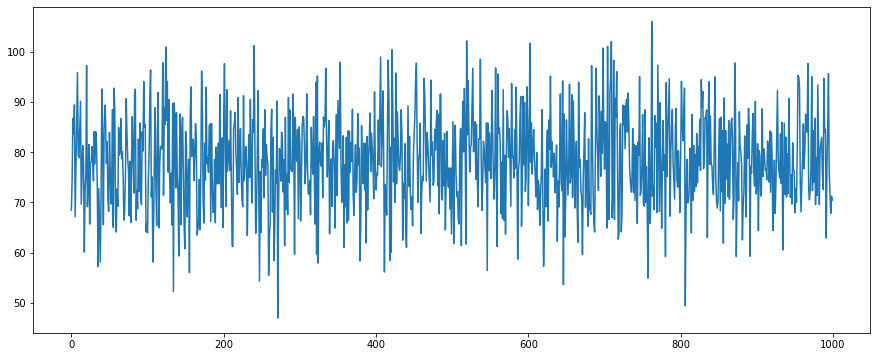

In [8]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize = (15, 6))
plt.plot(Gross_Profit)
plt.show()

In [9]:
max(Gross_Profit)   #Maior valor potencial do lucro bruto 

106.005993809068

In [10]:
min(Gross_Profit)     #Menor valor potencial do lucro bruto 

46.977543389337455

In [11]:
Gross_Profit.mean()      #  Meédio do lucro bruto 

78.2174513714733

In [12]:
Gross_Profit.std()       #Desvio padrão do lucro bruto 

9.33826469857442

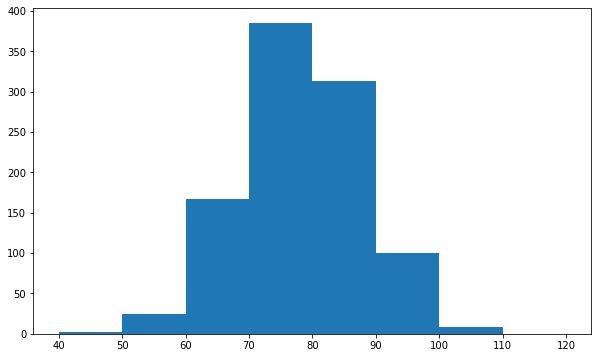

In [13]:
plt.figure(figsize = (10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

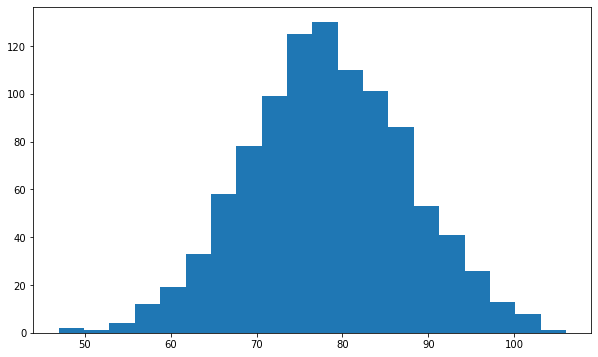

In [14]:
plt.figure(figsize= (10,6));
plt.hist(Gross_Profit, bins = 20);      # Divide em 20 classes e com isso fica claro a forma de um distrivuição normal. 
plt.show()

Tentando prever o preço futuro de uma ação 

In [15]:
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm 
%matplotlib inline 

In [16]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader (ticker, data_source = 'yahoo', start = '2007-1-1') ['Adj Close']

In [17]:
log_returns = np.log (1 + data.pct_change())     #pct_change() Fornce o retorno simples a parti de uma base de dados 
log_returns.tail()

,PG
Date,
2021-08-31,-0.003785
2021-09-01,0.010132
2021-09-02,0.000764
2021-09-03,0.000694
2021-09-07,-0.003756


<AxesSubplot:xlabel='Date'>

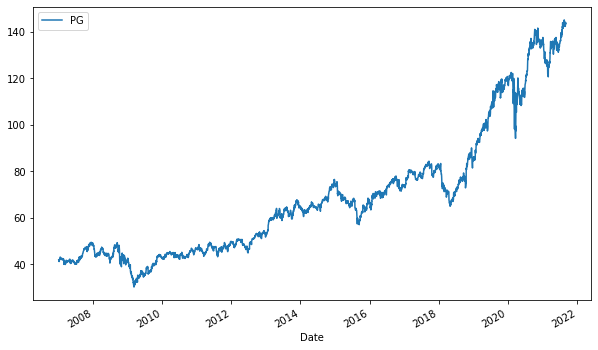

In [18]:
data.plot(figsize = (10, 6))

<AxesSubplot:xlabel='Date'>

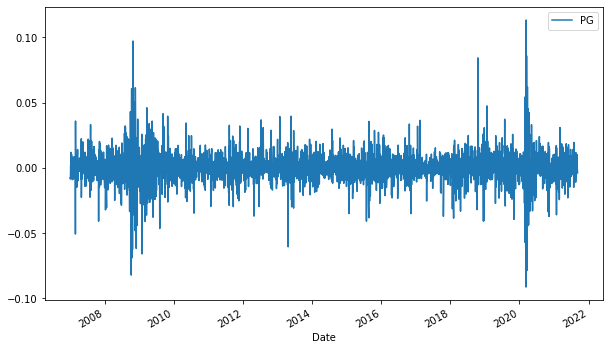

In [19]:
log_returns.plot(figsize = (10, 6))

In [20]:
u = log_returns.mean()    #Calculando a média
u

PG    0.000334
dtype: float64

In [21]:
var = log_returns.var()         #Calculando a variancia 
u
var

PG    0.000139
dtype: float64

In [22]:
drift = u - (0.5 * var)    #drift calcula a melhor aproximação de taxas futuras de retorno de uma ação
drift

PG    0.000264
dtype: float64

In [23]:
stdev = log_returns.std()
stdev

PG    0.011769
dtype: float64

In [24]:
type (drift)

pandas.core.series.Series

In [25]:
type (stdev)

pandas.core.series.Series

In [26]:
np.array (drift)

array([0.00026427])

In [27]:
drift.values

array([0.00026427])

In [28]:
stdev.values

array([0.01176921])

In [29]:
norm.ppf(0.95)

1.6448536269514722

In [30]:
x = np.random.rand (10, 2)
x

array([[3.40305050e-01, 4.53835691e-01],
       [3.15238395e-01, 9.57443136e-01],
       [3.80958637e-04, 1.12713431e-01],
       [6.84335185e-01, 6.74570296e-01],
       [8.83950087e-01, 3.32926189e-01],
       [8.47849647e-02, 8.37644371e-01],
       [5.54445013e-01, 9.70656159e-02],
       [4.80970025e-01, 2.91748751e-01],
       [6.95151742e-01, 5.72368818e-01],
       [1.01258219e-01, 8.09471810e-01]])

In [31]:
norm.ppf(x)

array([[-0.41163074, -0.11597623],
       [-0.48105587,  1.721756  ],
       [-3.36627132, -1.21222344],
       [ 0.47985623,  0.45256861],
       [ 1.19496725, -0.43184733],
       [-1.37358702,  0.98482252],
       [ 0.13689983, -1.29845441],
       [-0.04771918, -0.54828314],
       [ 0.51050671,  0.18240824],
       [-1.27441483,  0.87595154]])

In [32]:
z = norm.ppf(np.random.rand(10, 2))
z

array([[ 0.89882741,  0.55540953],
       [ 0.62298773, -1.29502076],
       [-0.21522817, -0.69810168],
       [-0.63327583,  1.77240281],
       [ 0.71680213, -0.64655907],
       [ 0.8416427 ,  0.19715693],
       [ 1.10722905,  1.01231602],
       [ 1.67471758, -0.25949261],
       [-0.04641175, -0.40169528],
       [-0.49548766, -0.35869595]])

In [33]:
t_intervals = 1000
iterations = 10

In [34]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf (np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00659591, 0.98274138, 0.99804941, ..., 1.01070746, 0.99137717,
        1.00669322],
       [1.00886663, 1.00806784, 1.00900941, ..., 0.98924352, 0.99244669,
        1.00848154],
       [0.98100794, 1.00975137, 1.01137762, ..., 1.0031145 , 1.00330363,
        1.00653275],
       ...,
       [1.00395584, 1.00738437, 1.01043074, ..., 0.9961525 , 1.03124909,
        1.0103669 ],
       [0.98918363, 0.99633555, 1.02738557, ..., 0.99234638, 0.99538476,
        0.99339348],
       [1.00234277, 1.01058272, 1.00135751, ..., 1.00138008, 0.9913073 ,
        1.0155055 ]])

----------------------------------------------------------------------------------------------------------------

In [43]:
S0 = data.iloc[-1]     # Ultima data negociada 
S0

PG    143.509995
Name: 2021-09-07 00:00:00, dtype: float64

In [39]:
price_list = np.zeros_like(daily_returns)    #
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
price_list[0] = S0
price_list

array([[143.50999451, 143.50999451, 143.50999451, ..., 143.50999451,
        143.50999451, 143.50999451],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [46]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[143.50999451, 143.50999451, 143.50999451, ..., 143.50999451,
        143.50999451, 143.50999451],
       [144.78244462, 144.66781034, 144.80293471, ..., 141.96633177,
        142.42601836, 144.72718033],
       [142.03272727, 146.07851898, 146.45044768, ..., 142.40848572,
        142.89654166, 145.67264745],
       ...,
       [192.52392708, 123.89158357, 174.09076149, ..., 152.89668796,
        151.63293587, 191.52365114],
       [190.44151744, 123.43758919, 178.85833547, ..., 151.72647416,
        150.9331141 , 190.25834712],
       [190.88767833, 124.74389439, 179.10113723, ..., 151.93586831,
        149.62109733, 193.20839846]])

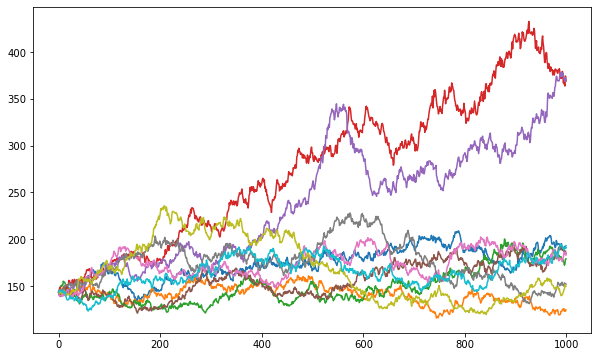

In [50]:
plt.figure (figsize=(10,6))    #Simulando os preços futuros 
plt.plot(price_list);

Derivativos 

In [51]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm 

In [83]:
def d1 (S, K, r, stdev, T):
    return (np.log(S / k) + (r + stdev ** 2/2) * T / (stdev * np.sqrt(T)))
    
def d2 (S, K, r, stdev, T):
    return (np.log (S / K) + (r - stdev **2/2 * T) / (stdev * np.sqrt(T)))

In [63]:
norm.cdf(0)     #Função distribuição cumulativa

0.5

In [64]:
norm.cdf(0.25)      #

0.5987063256829237

In [65]:
norm.cdf(0.75)  

0.7733726476231317

In [66]:
norm.cdf(9)  

1.0

In [67]:
def BSM(S, K, r, stdev, T):
    retuern (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r *T) * norm.cdf(d2(S, K, r, stdev, T)))

In [68]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader (ticker, data_source = 'yahoo', start = '2007-1-1', end = '2017-3-21') ['Adj Close']


In [69]:
S = data.iloc[-1]
S

PG    80.206482
Name: 2017-03-21 00:00:00, dtype: float64

In [70]:
log_returns = np.log(1 + data.pct_change())


In [72]:
stdev = log_returns.std() * 250 **0.5
stdev

PG    0.17655
dtype: float64

In [73]:
r = 0.025
K = 110.0
T = 1

In [82]:
d1(S, K, r, stdev, T)

NameError: name 'k' is not defined

In [80]:
d2(S, K, r, stdev, T)

PG   -0.262548
dtype: float64